<a href="https://colab.research.google.com/github/LivingstonTardzenyuy/Deep-Learning-with-TensorFlow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Neural Networks

We will be predicting numerical variables based on some other variables

In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.1


## creating some data to view and fit


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


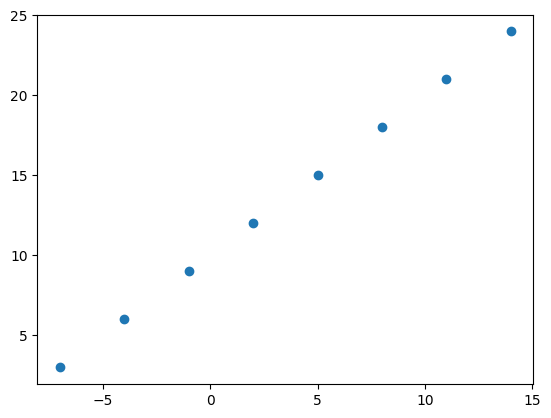

In [3]:
# Create features

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize
plt.scatter(X,y)

### Input and output shapes

In [4]:
# Create a demo tensor for housing predicting problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
# Turn our Numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X = tf.expand_dims(X, axis=-1)
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
input_shape = X[0], X.shape
output_shape = y[0], y.shape

input_shape, output_shape

((<tf.Tensor: shape=(1,), dtype=float64, numpy=array([-7.])>,
  TensorShape([8, 1])),
 (<tf.Tensor: shape=(), dtype=float64, numpy=3.0>, TensorShape([8])))

## Steps in modelling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of of a deep learning model.
2. Compiling a model - define the loss function (the function that tells our function how wrong it is)
3. Evalution Matrix - What we can use to interpret the performance of our model.
4. Fitting our model - Letting model find patterns between X and y (features and labels)


In [9]:
# set the random seed.
tf.random.set_seed(42)

# 1. Create a model usig the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
      loss = tf.keras.losses.mae, # mae is short for mean absolute error.
      optimizer = tf.keras.optimizers.SGD(),  # Stochastic gradient descent(SGD) helps to optimize our ML model
      metrics = ['mae'],
              )

# 3. Fit the model
model.fit(X, y, epochs=5)  # epochs defines how many times to go through the data

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - loss: 11.9905 - mae: 11.9905
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.8580 - mae: 11.8580
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.7255 - mae: 11.7255
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.5930 - mae: 11.5930
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 11.4605 - mae: 11.4605


In [10]:
 # check out X and y
 X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
# Making prediction using our model.
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[10.356928]], dtype=float32)

In [12]:
y_pred + 13

array([[23.356928]], dtype=float32)

## How to improve our model

We will improve our model using

1. **Creating a model** Add more layers,
increase each of the hidden layers.

2. **Compiling a model** - here we might change the optimization function or learning rate of the optimization function
3. **Fitting a model** - we might fit a model for more epochs(more training time)

In [13]:
# Let's rebuild our model
tf.random.set_seed(42)

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile our model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics = ['mae']
)

#3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - loss: 12.7987 - mae: 12.7987
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12.6662 - mae: 12.6662
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.5337 - mae: 12.5337
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.4012 - mae: 12.4012
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 12.2687 - mae: 12.2687
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 12.1362 - mae: 12.1362
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 12.0037 - mae: 12.0037
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 11.8712 - mae: 11.8712
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.7387 - mae: 11.7387
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.6062 - mae: 11.6062
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.4737 - mae: 11.4737
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.3412 - mae: 11.3412
Epoch 13/100
1/1 ━━━━━━━

In [14]:
# our data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[29.848808]], dtype=float32)

# Wowow our models looks really better now.

Let's try to change another paramter this time optimizer to see the effect

In [16]:

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['mae']
)

model.fit(X, y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step - loss: 14.4266 - mae: 14.4266
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 14.3816 - mae: 14.3816
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 14.3366 - mae: 14.3366
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 14.2916 - mae: 14.2916
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.2466 - mae: 14.2466
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 14.2016 - mae: 14.2016
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 14.1566 - mae: 14.1566
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 14.1116 - mae: 14.1116
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 14.0666 - mae: 14.0666
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 14.0216 - mae: 14.0216
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 13.9766 - mae: 13.9766
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 13.9316 - mae: 13.9316
Epoch 13/100
1/1 ━━━━━━━

In [17]:
model.predict(np.array([17]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[13.49932]], dtype=float32)

# Improving our model

We will increase the dense layers

In [27]:
# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['mae']
)

#3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/step - loss: 13.4540 - mae: 13.4540
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.5551 - mae: 12.5551
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.6664 - mae: 11.6664
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.7707 - mae: 10.7707
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.8831 - mae: 9.8831
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.1394 - mae: 9.1394
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 8.3978 - mae: 8.3978
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7.6317 - mae: 7.6317
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 6.8436 - mae: 6.8436
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 6.0259 - mae: 6.0259
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 5.1724 - mae: 5.1724
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 4.2805 - mae: 4.2805
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [28]:
model.predict(np.array([17]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[27.533546]], dtype=float32)